# Exercise 6.2: Dimensionality Reduction and Feature Selection

Author: Jordan,Andrew

Date: 07/14/2022

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree as t
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from numpy import array

%pwd

'C:\\Users\\Andrew\\Documents\\Grad School\\DSC 550 - Data Mining\\Assignments'

## Part 1: PCA and Variance Threshold in a Linear Regression

### 1. Import the housing data as a data frame and ensure that the data is loaded properly.

In [47]:
#Import data
house = pd.read_csv("data/week6_train.csv")
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 2. Drop the "Id" column and any features that are missing more than 40% of their values.

In [48]:
#Set 40% value
missing_threshold = 40.0
#Set 60% value
min_keep = int(((100-missing_threshold)/100)*house.shape[0])

In [49]:
#Drop ID column
house = house.drop(['Id'],axis=1)
#Drop features below threshold
house = house.dropna(thresh=min_keep,axis=1)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


### 3. For numerical columns, fill in any missing data with the median value.

In [50]:
#Get numerical columns
cols_num = house.select_dtypes(include='number').columns
#Replace null values with median
for column in cols_num:
    median=house[column].median()
    house[column] = house[column].fillna(median)

### 4. For categorical columns, fill in any missing data with the most common value (mode).

In [51]:
#Get categorical columns
cols_all = house.columns
cols_cat = list(set(cols_all)-set(cols_num))
#Replace null values with mode
for column in cols_cat:
    mode = house[column].mode()
    house[column] = house[column].fillna(mode)

### 5. Convert the categorical columns to dummy variables.

In [52]:
#Create dummy variables
house_dumb = pd.get_dummies(house, columns=cols_cat)
house_dumb.head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,1,0,0,0,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,1,0,0,0,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,1,0,0,0,0,0,0,0,1,0
5,50,85.0,14115,5,5,1993,1995,0.0,732,0,...,0,0,0,1,0,0,0,0,1,0
6,20,75.0,10084,8,5,2004,2005,186.0,1369,0,...,1,0,0,0,0,0,0,0,1,0
7,60,69.0,10382,7,6,1973,1973,240.0,859,32,...,0,0,0,0,0,0,0,0,1,0
8,50,51.0,6120,7,5,1931,1950,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,190,50.0,7420,5,6,1939,1950,0.0,851,0,...,0,0,0,0,0,0,0,0,1,0


### 6. Split the data into a training and test set, where the SalePrice column is the target.

In [53]:
#Create arrays
x = house_dumb.drop('SalePrice', axis=1)
y = house_dumb['SalePrice']

#Create training and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .20)

### 7. Run a linear regression and report the R2-value and RMSE on the test set.

In [54]:
#Create model
lr = LinearRegression()
#Fit model
lr.fit(x_train, y_train)

LinearRegression()

In [55]:
#Get predictions
test_pred = lr.predict(x_test)

print('R2:', metrics.r2_score(y_test, test_pred))
print('RMSE:',metrics.mean_squared_error(y_test, test_pred, squared=False))

R2: 0.8924989275132108
RMSE: 26072.745580633167


### 8. Fit and transform the training features with a PCA so that 90% of the variance is retained (see section 9.1 in the Machine Learning with Python Cookbook).

In [56]:
#Create scaler
scaler = StandardScaler()

#Scale features
x_train_scaled = scaler.fit_transform(x_train)

#Create PCA
pca90 = PCA(n_components=.9)
x_train_pca90 = pca90.fit_transform(x_train_scaled)

### 9. How many features are in the PCA-transformed matrix?

In [57]:
x_train_pca90.shape

(1168, 139)

The PCA-transformed matrix has 139 features.

### 10. Transform but DO NOT fit the test features with the same PCA.

In [58]:
#Transform test
x_test_scaled = scaler.transform(x_test)

#Run PCA
x_test_pca90 = pca90.transform(x_test_scaled)

### 11. Repeat step 7 with your PCA transformed data.

In [59]:
#Create model
lr_pca = LinearRegression()
#Fit Model
lr_pca.fit(x_train_pca90, y_train)

LinearRegression()

In [60]:
#Get predcitions
test_pred_pca = lr_pca.predict(x_test_pca90)

print('R2:', metrics.r2_score(y_test, test_pred_pca))
print('RMSE:',metrics.mean_squared_error(y_test, test_pred_pca, squared=False))

R2: 0.8874664244757376
RMSE: 26676.04413238975


### 12. Take your original training features (from step 6) and apply a min-max scaler to them.

In [61]:
#Create scaler
minmax = MinMaxScaler()

#Minmax scale features
x_train_minmax = minmax.fit_transform(x_train)

### 13. Find the min-max scaled features in your training set that have a variance above 0.1 (see Section 10.1 in the Machine Learning with Python Cookbook).

In [62]:
#Create thresholder
thresholder = VarianceThreshold(threshold = 0.1)

#Create high variance threshold matrix
x_train_high = thresholder.fit_transform(x_train_minmax)

### 14. Transform but DO NOT fit the test features with the same steps applied in steps 11 and 12.

In [63]:
#Minmax scale test
x_test_minmax = minmax.transform(x_test)

#Create high variance threshold matrix
x_test_high = thresholder.transform(x_test_minmax)

### 15. Repeat step 7 with the high variance data.

In [64]:
#Create model
lr_high = LinearRegression()
lr_high.fit(x_train_high, y_train)

LinearRegression()

In [65]:
#Get predictions
test_pred_high = lr_high.predict(x_test_high)

print('R2:', metrics.r2_score(y_test, test_pred_high))
print('RMSE:',metrics.mean_squared_error(y_test, test_pred_high, squared=False))

R2: 0.6707532251040984
RMSE: 45629.019136166855


### 16. Summarize your findings.

The PCA transformed data cut the features by over half, from 270 to 139, and maintained R2 and RMSE scores close to the original model's results. The MinMax transformed data performed much worse than the original model with a significantly higher RMSE score and an R2 score over 14 points lower. 

## Part 2: Categorical Feature Selection

### 1. Import the data as a data frame and ensure it is loaded correctly.

In [66]:
#Import data
mush = pd.read_csv("data/mushrooms.csv")
mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### 2. Convert the categorical features (all of them) to dummy variables

In [67]:
#Reserve class column
mush_class = mush['class']
mush = mush.drop('class', axis=1)

#Create dummy variables
mush_dumb = pd.get_dummies(mush)

mush_dumb.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


### 3. Split the data into a training and test set.

In [69]:
#Create arrays
mush_x = mush_dumb
mush_y = mush_class

#Create training and test sets
mush_x_train, mush_x_test, mush_y_train, mush_y_test = train_test_split(mush_x, mush_y, test_size=.2)

### 4. Fit a decision tree classifier on the training set.

In [71]:
#Create decision tree classifier
dtc = DecisionTreeClassifier()

#Train model
dtc_model = dtc.fit(mush_x_train, mush_y_train)

### 5. Report the accuracy and create a confusion matrix for the model prediction on the test set.

In [73]:
#Get predictions
mush_y_test_pred = dtc_model.predict(mush_x_test)

#Get accuracy score
accuracy_score(mush_y_test, mush_y_test_pred)

1.0

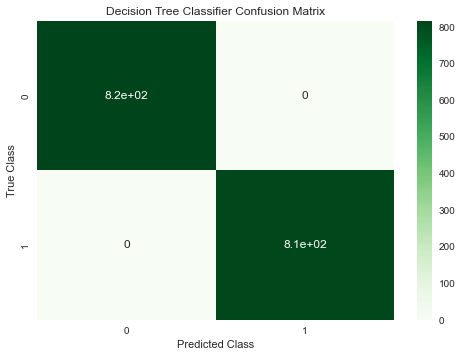

In [81]:
#Create confusion matrix
cm = confusion_matrix(mush_y_test, mush_y_test_pred)

#Create dataframe
cm_df = pd.DataFrame(cm)

#Create heatmap
sns.heatmap(cm_df, annot=True, cmap='Greens')
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.title("Decision Tree Classifier Confusion Matrix")
plt.show()

### 6. Create a visualization of the decision tree.

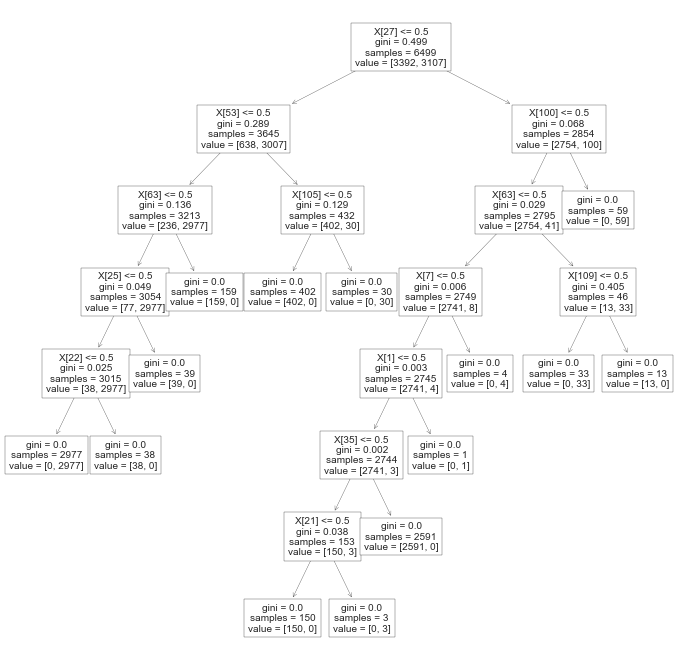

In [91]:
plt.figure(figsize=(12,12))
t.plot_tree(dtc_model, fontsize=10)
plt.show()

### 7. Use a χ2-statistic selector to pick the five best features for this data (see section 10.4 of the Machine Learning with Python Cookbook).

In [93]:
#Select five best features
chi2_selector = SelectKBest(chi2, k=5)
features_kbest = chi2_selector.fit_transform(mush_x_train, mush_y_train)

### 8. Which five features were selected in step 7? Hint: Use the get_support function.

In [97]:
#Get selected features
the_five = chi2_selector.get_support()
all_feats = array(mush_x_train.columns)

#Print five features
print(all_feats[the_five])


['odor_f' 'odor_n' 'gill-color_b' 'stalk-surface-above-ring_k'
 'stalk-surface-below-ring_k']


### 9. Repeat steps 4 and 5 with the five best features selected in step 7.

In [98]:
#Create Decision Tree Classifier
dtc2 = DecisionTreeClassifier()

#Train model
dtc2_model = dtc2.fit(features_kbest, mush_y_train)

In [99]:
#Get predictions
dtc2_test = chi2_selector.transform(mush_x_test)
dtc2_test_pred = dtc2_model.predict(dtc2_test)

#Get accuracy score
accuracy_score(mush_y_test, dtc2_test_pred)

0.9230769230769231

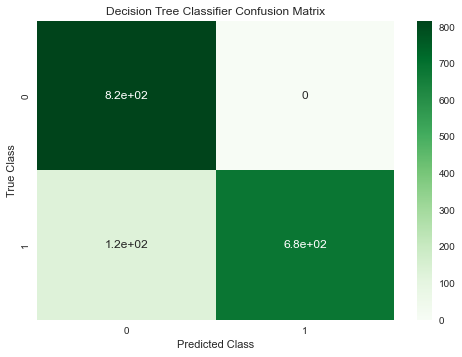

In [100]:
#Create confusion matrix
cm2 = confusion_matrix(mush_y_test, dtc2_test_pred)

#Create dataframe
cm2_df = pd.DataFrame(cm2)

#Create heatmap
sns.heatmap(cm2_df, annot=True, cmap='Greens')
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.title("Decision Tree Classifier Confusion Matrix")
plt.show()

### 10. Summarize your findings.

While the original decision tree classifier accuracy score was a 100%, reducing the features to only the best 5 allowed for a significantl smaller amount of features while only sacrificing 8% accuracy score for an accuracy score of approximately 92%.